In [1]:
# Core
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

# ML & preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

# Imbalance
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

In [2]:
dfs0 =pd.read_csv(r"C:\Desktop\BOT-LOT DATASET\data\UNSW_2018_IoT_Botnet_Full5pc_1.csv", low_memory=False)

In [3]:
dfs1 =pd.read_csv(r"C:\Desktop\BOT-LOT DATASET\data\UNSW_2018_IoT_Botnet_Full5pc_2.csv", low_memory=False)

In [4]:
dfs2 =pd.read_csv(r"C:\Desktop\BOT-LOT DATASET\data\UNSW_2018_IoT_Botnet_Full5pc_3.csv", low_memory=False)

In [5]:
dfs3 =pd.read_csv(r"C:\Desktop\BOT-LOT DATASET\data\UNSW_2018_IoT_Botnet_Full5pc_4.csv", low_memory=False)


In [6]:
frame=[dfs0,dfs1,dfs2,dfs3]

In [7]:
df =pd.concat(frame)
print(df.head())

   pkSeqID         stime flgs  flgs_number proto  proto_number  \
0        1  1.528089e+09    e            1   tcp             1   
1        2  1.528089e+09    e            1   arp             2   
2        3  1.528089e+09    e            1   tcp             1   
3        4  1.528089e+09    e            1   tcp             1   
4        5  1.528089e+09    e            1   tcp             1   

             saddr  sport            daddr dport  ...  AR_P_Proto_P_DstIP  \
0  192.168.100.147  49960    192.168.100.7    80  ...             1.12704   
1    192.168.100.7     -1  192.168.100.147    -1  ...         15267.20000   
2  192.168.100.147  49962    192.168.100.7    80  ...             1.12704   
3  192.168.100.147  49964    192.168.100.7    80  ...             1.12704   
4  192.168.100.147  49966    192.168.100.7    80  ...             1.12704   

   N_IN_Conn_P_DstIP N_IN_Conn_P_SrcIP  AR_P_Proto_P_Sport  \
0                 96                75            1.133720   
1               

In [8]:
df.shape


(3668522, 46)

In [9]:
print(len(df)) 

3668522


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3668522 entries, 0 to 668521
Data columns (total 46 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   pkSeqID                           int64  
 1   stime                             float64
 2   flgs                              object 
 3   flgs_number                       int64  
 4   proto                             object 
 5   proto_number                      int64  
 6   saddr                             object 
 7   sport                             object 
 8   daddr                             object 
 9   dport                             object 
 10  pkts                              int64  
 11  bytes                             int64  
 12  state                             object 
 13  state_number                      int64  
 14  ltime                             float64
 15  seq                               int64  
 16  dur                               float64


In [11]:
df.columns.tolist()

['pkSeqID',
 'stime',
 'flgs',
 'flgs_number',
 'proto',
 'proto_number',
 'saddr',
 'sport',
 'daddr',
 'dport',
 'pkts',
 'bytes',
 'state',
 'state_number',
 'ltime',
 'seq',
 'dur',
 'mean',
 'stddev',
 'sum',
 'min',
 'max',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'srate',
 'drate',
 'TnBPSrcIP',
 'TnBPDstIP',
 'TnP_PSrcIP',
 'TnP_PDstIP',
 'TnP_PerProto',
 'TnP_Per_Dport',
 'AR_P_Proto_P_SrcIP',
 'AR_P_Proto_P_DstIP',
 'N_IN_Conn_P_DstIP',
 'N_IN_Conn_P_SrcIP',
 'AR_P_Proto_P_Sport',
 'AR_P_Proto_P_Dport',
 'Pkts_P_State_P_Protocol_P_DestIP',
 'Pkts_P_State_P_Protocol_P_SrcIP',
 'attack',
 'category',
 'subcategory']

In [12]:
df.isnull().sum()

pkSeqID                             0
stime                               0
flgs                                0
flgs_number                         0
proto                               0
proto_number                        0
saddr                               0
sport                               0
daddr                               0
dport                               0
pkts                                0
bytes                               0
state                               0
state_number                        0
ltime                               0
seq                                 0
dur                                 0
mean                                0
stddev                              0
sum                                 0
min                                 0
max                                 0
spkts                               0
dpkts                               0
sbytes                              0
dbytes                              0
rate        

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.describe()

,pkSeqID,stime,flgs_number,proto_number,pkts,bytes,state_number,ltime,seq,dur,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
count,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,...,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06
mean,1.834262e+06,1.528050e+09,1.490206e+00,2.095884e+00,7.725963e+00,8.690501e+02,3.134390e+00,1.528050e+09,1.213204e+05,2.033479e+01,...,7.369070e+02,3.327439e+02,2.851832e+02,9.245168e+01,8.253848e+01,4.564945e+02,5.385196e+02,6.422897e+02,5.859984e+02,9.998700e-01
std,1.059011e+06,2.581498e+05,8.652444e-01,9.990837e-01,1.155876e+02,1.122667e+05,1.186971e+00,2.581507e+05,7.579428e+04,2.148764e+01,...,6.527134e+02,8.466031e+03,4.096943e+03,1.817643e+01,2.439739e+01,1.432917e+04,1.569824e+04,4.533432e+02,4.332619e+02,1.140212e-02
min,1.000000e+00,1.526344e+09,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,1.000000e+00,1.526344e+09,1.000000e+00,0.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,9.171312e+05,1.528085e+09,1.000000e+00,1.000000e+00,5.000000e+00,4.200000e+02,3.000000e+00,1.528085e+09,5.487600e+04,1.256256e+01,...,5.000000e+02,2.359950e-01,2.436680e-01,1.000000e+02,6.900000e+01,2.314810e-01,2.457730e-01,3.240000e+02,2.940000e+02,1.000000e+00
50%,1.834262e+06,1.528096e+09,1.000000e+00,3.000000e+00,7.000000e+00,6.000000e+02,4.000000e+00,1.528096e+09,1.177690e+05,1.550852e+01,...,7.000000e+02,3.900890e-01,3.986290e-01,1.000000e+02,1.000000e+02,3.785910e-01,3.943060e-01,6.000000e+02,5.000000e+02,1.000000e+00
75%,2.751392e+06,1.528099e+09,2.000000e+00,3.000000e+00,9.000000e+00,7.700000e+02,4.000000e+00,1.528099e+09,1.849300e+05,2.709986e+01,...,9.200000e+02,5.725580e-01,5.796390e-01,1.000000e+02,1.000000e+02,5.725550e-01,5.769710e-01,8.280000e+02,8.000000e+02,1.000000e+00
max,3.668522e+06,1.529381e+09,9.000000e+00,5.000000e+00,7.005700e+04,7.183334e+07,1.100000e+01,1.529382e+09,2.622120e+05,2.771485e+03,...,2.444250e+05,2.714290e+06,1.000000e+06,1.000000e+02,1.000000e+02,3.000000e+06,2.000000e+06,1.125440e+05,1.179390e+05,1.000000e+00


In [15]:
df.nunique()

pkSeqID                             3668522
stime                                392259
flgs                                      9
flgs_number                               9
proto                                     5
proto_number                              5
saddr                                    21
sport                                 65541
daddr                                    84
dport                                  7698
pkts                                    123
bytes                                  1633
state                                    11
state_number                             11
ltime                                383624
seq                                  262212
dur                                  612509
mean                                 507089
stddev                               421379
sum                                  934972
min                                  271147
max                                  594525
spkts                           

In [16]:
df.drop(['flgs'], axis=1, inplace=True)

In [17]:
df.head()

,pkSeqID,stime,flgs_number,proto,proto_number,saddr,sport,daddr,dport,pkts,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1,1.528089e+09,1,tcp,1,192.168.100.147,49960,192.168.100.7,80,8,...,1.12704,96,75,1.133720,1.129970,770,602,1,DoS,HTTP
1,2,1.528089e+09,1,arp,2,192.168.100.7,-1,192.168.100.147,-1,2,...,15267.20000,1,2,0.005142,0.005142,2,6,1,DoS,HTTP
2,3,1.528089e+09,1,tcp,1,192.168.100.147,49962,192.168.100.7,80,8,...,1.12704,96,75,1.135100,1.129970,770,602,1,DoS,HTTP
3,4,1.528089e+09,1,tcp,1,192.168.100.147,49964,192.168.100.7,80,8,...,1.12704,96,75,1.135140,1.129970,770,602,1,DoS,HTTP
4,5,1.528089e+09,1,tcp,1,192.168.100.147,49966,192.168.100.7,80,8,...,1.12704,96,75,1.135260,1.129970,770,602,1,DoS,HTTP


In [18]:
df.drop(columns=['pkSeqID'], inplace=True)

In [19]:
print(df.shape)
print(df.columns[:10])
print('pkSeqID' in df.columns)

(3668522, 44)
Index(['stime', 'flgs_number', 'proto', 'proto_number', 'saddr', 'sport',
       'daddr', 'dport', 'pkts', 'bytes'],
      dtype='object')
False


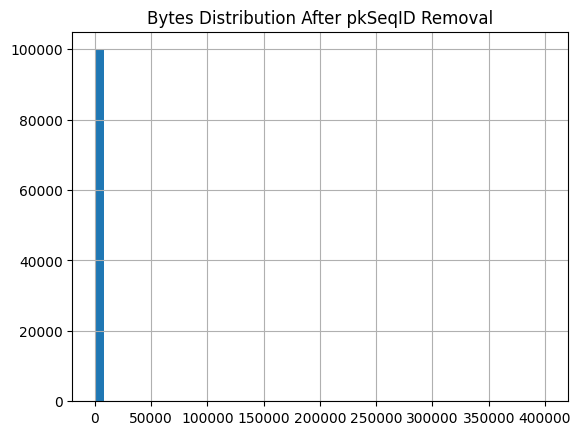

In [20]:
import matplotlib.pyplot as plt

df['bytes'].sample(100000).hist(bins=50)
plt.title('Bytes Distribution After pkSeqID Removal')
plt.show()

In [21]:
df.drop(columns=['proto', 'state'], inplace=True)

In [22]:
print(df.shape)
print('proto' in df.columns, 'state' in df.columns)
print('proto_number' in df.columns, 'state_number' in df.columns)

(3668522, 42)
False False
True True


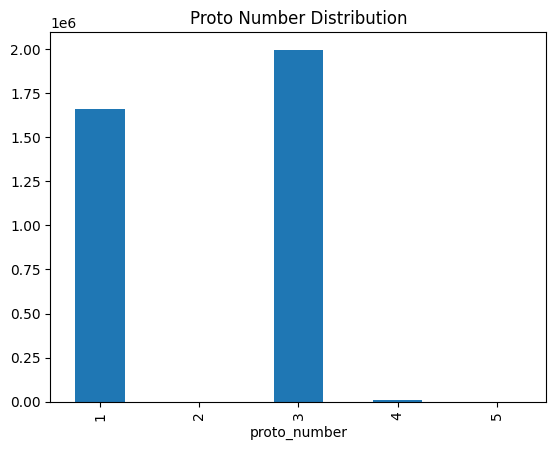

In [23]:


df['proto_number'].value_counts().sort_index().plot(kind='bar')
plt.title('Proto Number Distribution')
plt.show()

In [24]:
df.drop(columns=['saddr', 'daddr'], inplace=True)
print(df.shape)
print('saddr' in df.columns, 'daddr' in df.columns)

(3668522, 40)
False False


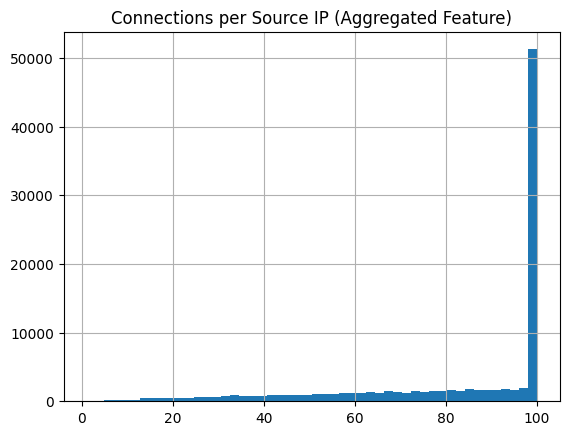

In [25]:



df['N_IN_Conn_P_SrcIP'].sample(100000).hist(bins=50)
plt.title('Connections per Source IP (Aggregated Feature)')
plt.show()

In [26]:
df.drop(columns=['sport'], inplace=True)

In [27]:
print(df.shape)
print('sport' in df.columns)

(3668522, 39)
False


In [28]:
def bucket_dport(p):
    try:
        p = int(p)
        if p < 0:
            return 0
        elif p <= 1023:
            return 1
        elif p <= 49151:
            return 2
        else:
            return 3
    except:
        return 0


df['dport_bucket'] = df['dport'].apply(bucket_dport).astype('int8')

In [29]:
df.drop(columns=['dport'], inplace=True)
print(df.shape)
print('dport' in df.columns, 'dport_bucket' in df.columns)
df['dport_bucket'].value_counts(normalize=True)

(3668522, 39)
False True


dport_bucket
1    0.980736
2    0.015199
0    0.002526
3    0.001539
Name: proportion, dtype: float64

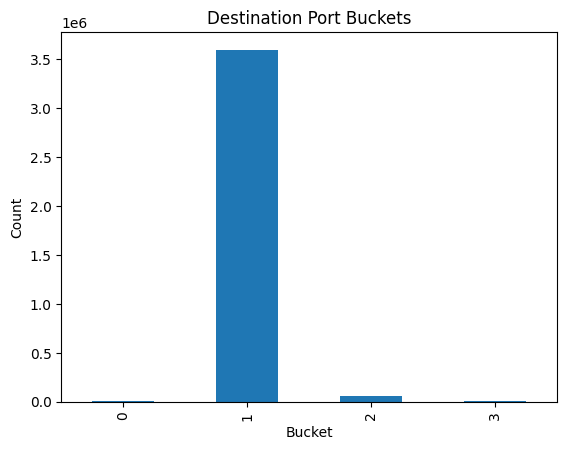

In [30]:

df['dport_bucket'].value_counts().sort_index().plot(kind='bar')
plt.title('Destination Port Buckets')
plt.xlabel('Bucket')
plt.ylabel('Count')
plt.show()

In [31]:
df.select_dtypes(include=['object']).columns

Index(['category', 'subcategory'], dtype='object')

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['category_enc'] = le.fit_transform(df['category'])
df[['category', 'category_enc']].head(10)
df['category_enc'].value_counts()

category_enc
0    1926624
1    1650260
3      91082
2        477
4         79
Name: count, dtype: int64

In [33]:
df.drop(columns=['category'], inplace=True)

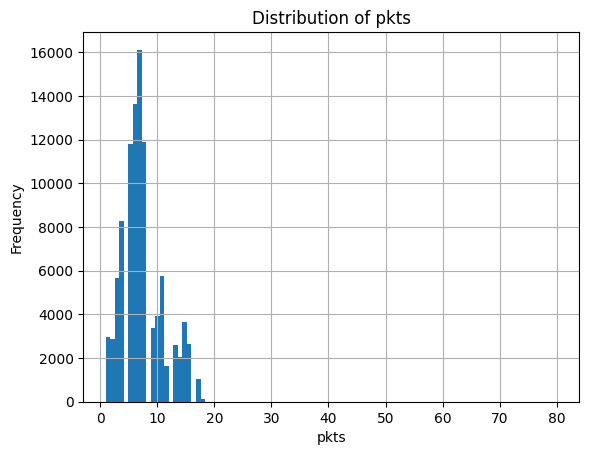

In [34]:

# Sample for faster plotting
df['pkts'].sample(100000).hist(bins=100)
plt.title('Distribution of pkts')
plt.xlabel('pkts')
plt.ylabel('Frequency')
plt.show()

In [35]:
lower = df['pkts'].quantile(0.01)
upper = df['pkts'].quantile(0.99)

df['pkts_clipped'] = df['pkts'].clip(lower, upper)

In [37]:
import numpy as np
df['pkts_log'] = np.log1p(df['pkts_clipped'])

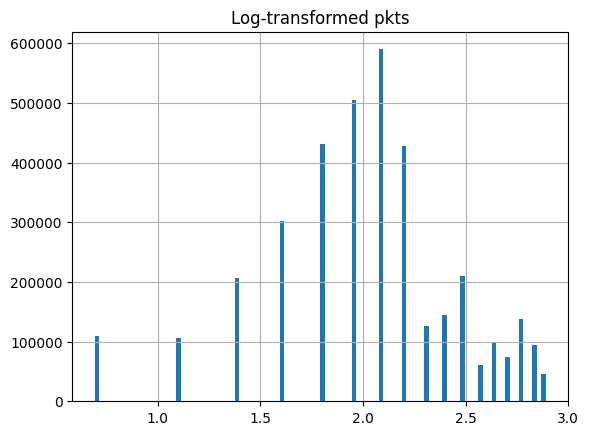

In [38]:
df[['pkts', 'pkts_clipped', 'pkts_log']].describe()
df['pkts_log'].hist(bins=100)
plt.title('Log-transformed pkts')
plt.show()

In [39]:
df[['pkts', 'pkts_clipped', 'pkts_log']].describe()


,pkts,pkts_clipped,pkts_log
count,3.668522e+06,3.668522e+06,3.668522e+06
mean,7.725963e+00,7.408126e+00,2.028659e+00
std,1.155876e+02,3.674810e+00,4.663661e-01
min,1.000000e+00,1.000000e+00,6.931472e-01
25%,5.000000e+00,5.000000e+00,1.791759e+00
50%,7.000000e+00,7.000000e+00,2.079442e+00
75%,9.000000e+00,9.000000e+00,2.302585e+00
max,7.005700e+04,1.700000e+01,2.890372e+00


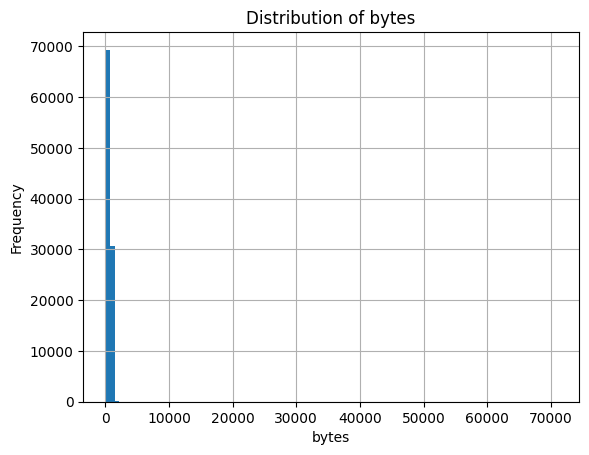

In [40]:
df['bytes'].sample(100000).hist(bins=100)
plt.title('Distribution of bytes')
plt.xlabel('bytes')
plt.ylabel('Frequency')
plt.show()

In [41]:
lower = df['bytes'].quantile(0.01)
upper = df['bytes'].quantile(0.99)

df['bytes_clipped'] = df['bytes'].clip(lower, upper)

# Optional log transform
df['bytes_log'] = np.log1p(df['bytes_clipped'])

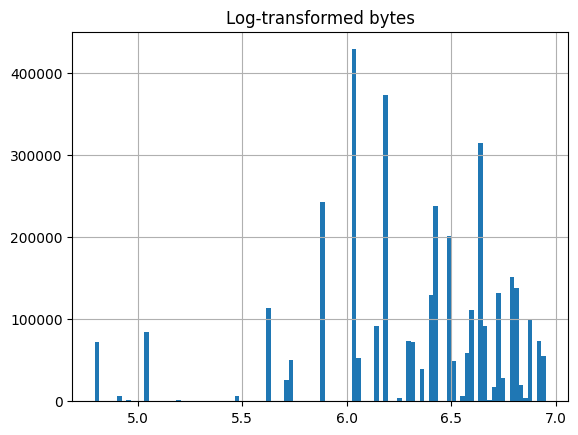

In [42]:
df[['bytes', 'bytes_clipped', 'bytes_log']].describe()
df['bytes_log'].hist(bins=100)
plt.title('Log-transformed bytes')
plt.show()

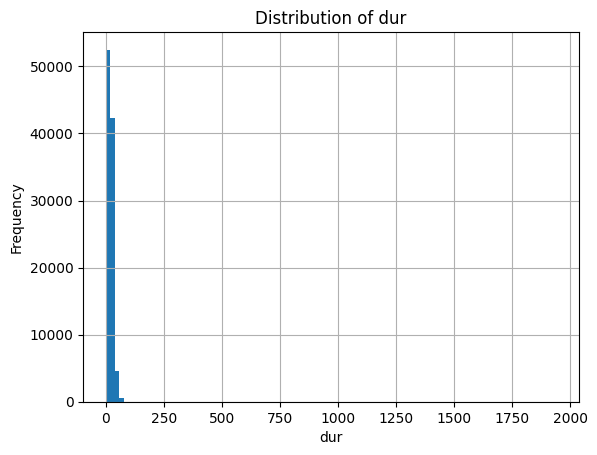

In [43]:
df['dur'].sample(100000).hist(bins=100)
plt.title('Distribution of dur')
plt.xlabel('dur')
plt.ylabel('Frequency')
plt.show()

In [44]:
lower = df['dur'].quantile(0.01)
upper = df['dur'].quantile(0.99)

df['dur_clipped'] = df['dur'].clip(lower, upper)

# Optional log transform
df['dur_log'] = np.log1p(df['dur_clipped'])

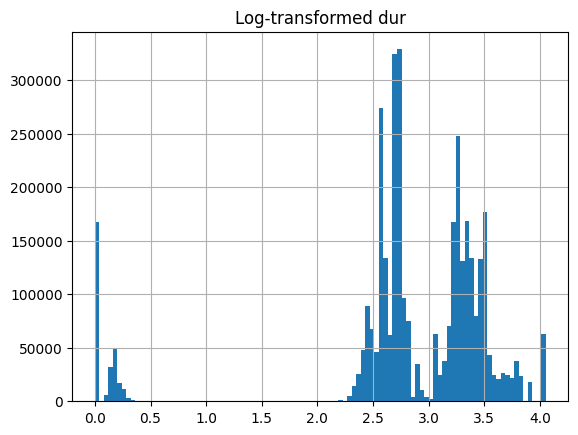

In [45]:
df[['dur', 'dur_clipped', 'dur_log']].describe()
df['dur_log'].hist(bins=100)
plt.title('Log-transformed dur')
plt.show()


In [46]:
df[['dur', 'dur_clipped', 'dur_log']].describe()

,dur,dur_clipped,dur_log
count,3.668522e+06,3.668522e+06,3.668522e+06
mean,2.033479e+01,1.999793e+01,2.801921e+00
std,2.148764e+01,1.119830e+01,8.888629e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.256256e+01,1.256256e+01,2.607313e+00
50%,1.550852e+01,1.550852e+01,2.803877e+00
75%,2.709986e+01,2.709986e+01,3.335764e+00
max,2.771485e+03,5.657604e+01,4.053106e+00


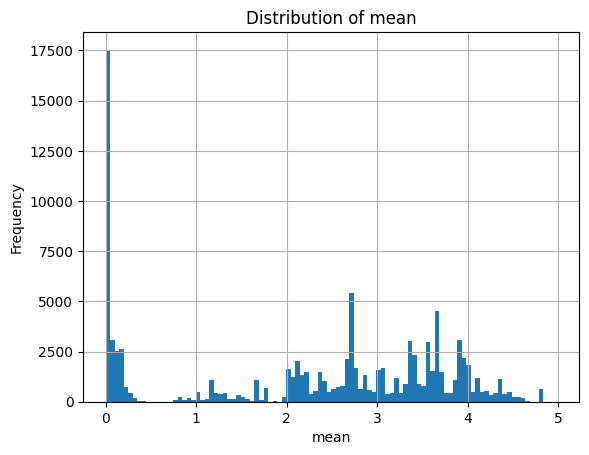

In [47]:
df['mean'].sample(100000).hist(bins=100)
plt.title('Distribution of mean')
plt.xlabel('mean')
plt.ylabel('Frequency')
plt.show()

In [48]:
lower = df['mean'].quantile(0.01)
upper = df['mean'].quantile(0.99)

df['mean_clipped'] = df['mean'].clip(lower, upper)

In [49]:
df['mean_log'] = np.log1p(df['mean_clipped'])

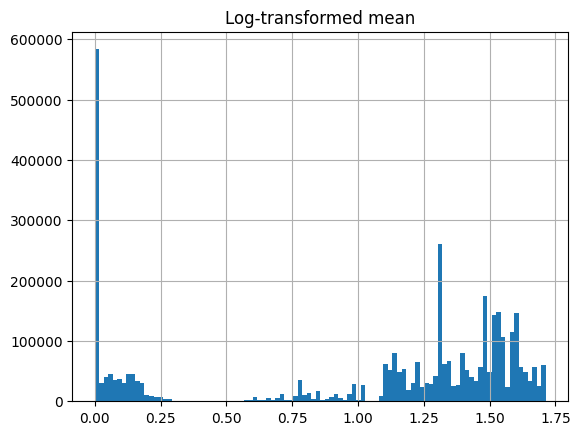

In [50]:
df[['mean', 'mean_clipped', 'mean_log']].describe()
df['mean_log'].hist(bins=100)
plt.title('Log-transformed mean')
plt.show()

In [51]:
df[['mean', 'mean_clipped', 'mean_log']].describe()

,mean,mean_clipped,mean_log
count,3.668522e+06,3.668522e+06,3.668522e+06
mean,2.231063e+00,2.229301e+00,1.011987e+00
std,1.517728e+00,1.514893e+00,6.222304e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.819670e-01,1.819670e-01,1.671800e-01
50%,2.690125e+00,2.690125e+00,1.305660e+00
75%,3.565203e+00,3.565203e+00,1.518463e+00
max,4.981882e+00,4.549275e+00,1.713667e+00


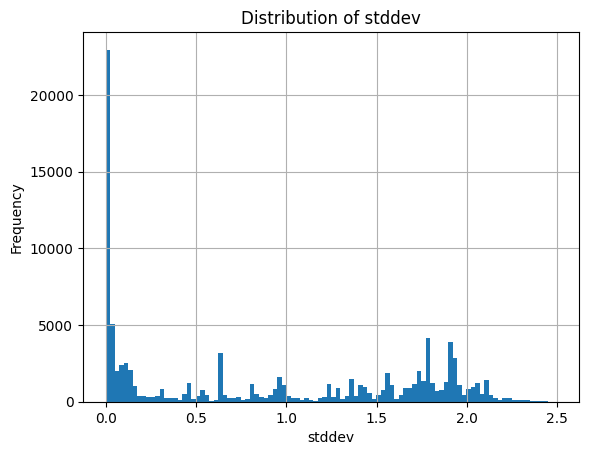

In [52]:
df['stddev'].sample(100000).hist(bins=100)
plt.title('Distribution of stddev')
plt.xlabel('stddev')
plt.ylabel('Frequency')
plt.show()

In [53]:
lower = df['stddev'].quantile(0.01)
upper = df['stddev'].quantile(0.99)

df['stddev_clipped'] = df['stddev'].clip(lower, upper)

In [54]:
df['stddev_log'] = np.log1p(df['stddev_clipped'])

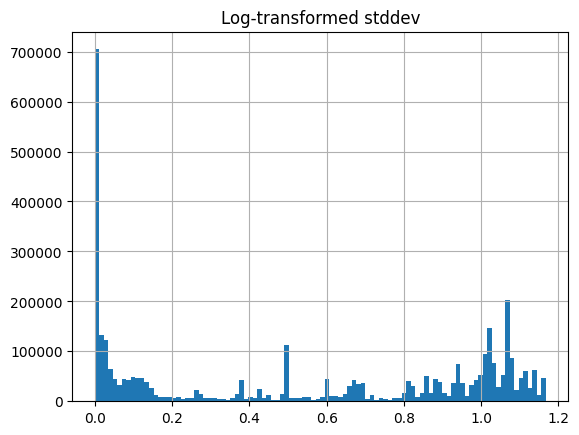

In [55]:
df[['stddev', 'stddev_clipped', 'stddev_log']].describe()
df['stddev_log'].hist(bins=100)
plt.title('Log-transformed stddev')
plt.show()

In [56]:
df[['stddev', 'stddev_clipped', 'stddev_log']].describe()

,stddev,stddev_clipped,stddev_log
count,3.668522e+06,3.668522e+06,3.668522e+06
mean,8.871499e-01,8.863456e-01,5.374095e-01
std,8.037139e-01,8.023177e-01,4.476917e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.001900e-02,3.001900e-02,2.957725e-02
50%,7.938960e-01,7.938960e-01,5.843898e-01
75%,1.745296e+00,1.745296e+00,1.009889e+00
max,2.496763e+00,2.213064e+00,1.167225e+00


In [57]:
for col in ['sum', 'min', 'max']:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[f'{col}_clipped'] = df[col].clip(lower, upper)

In [58]:
for col in ['sum', 'min', 'max']:
    df[f'{col}_log'] = np.log1p(df[f'{col}_clipped'])

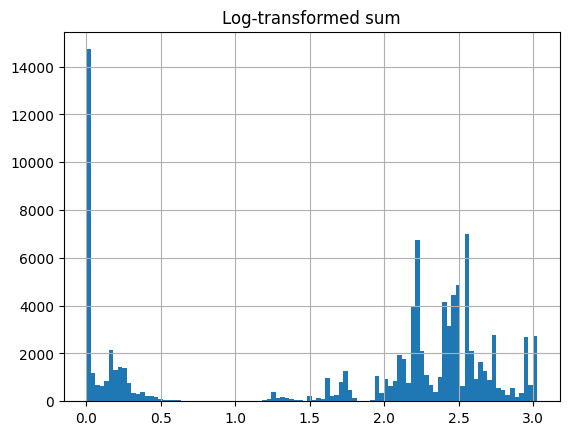

In [59]:
df[['sum', 'sum_clipped', 'sum_log']].describe()
df['sum_log'].sample(100000).hist(bins=100)
plt.title('Log-transformed sum')
plt.show()

In [60]:
df[['sum', 'sum_clipped', 'sum_log']].describe()

,sum,sum_clipped,sum_log
count,3.668522e+06,3.668522e+06,3.668522e+06
mean,7.721635e+00,7.692101e+00,1.765621e+00
std,7.616199e+00,5.626923e+00,1.062568e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.445982e-01,3.445982e-01,2.960953e-01
50%,8.269959e+00,8.269959e+00,2.226779e+00
75%,1.171040e+01,1.171040e+01,2.542421e+00
max,1.913194e+03,1.961826e+01,3.026177e+00


In [61]:
log_features = [
    'pkts_log', 'bytes_log', 'dur_log',
    'mean_log', 'stddev_log',
    'sum_log', 'min_log', 'max_log'
]

In [62]:
stable_features = [
    'flgs_number',
    'proto_number',
    'state_number',
    'spkts', 'dpkts',
    'sbytes', 'dbytes',
    'rate', 'srate', 'drate',
    'TnBPSrcIP', 'TnBPDstIP',
    'TnP_PSrcIP', 'TnP_PDstIP',
    'TnP_PerProto', 'TnP_Per_Dport',
    'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP',
    'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP',
    'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport',
    'Pkts_P_State_P_Protocol_P_DestIP',
    'Pkts_P_State_P_Protocol_P_SrcIP'
]

In [63]:
ohe_features = [
    col for col in df.columns
    if col.startswith('proto_') or col.startswith('state_')
]

In [64]:
FEATURES = log_features + stable_features + ohe_features

In [66]:
target = 'category_enc'  

df_final = df[FEATURES + [target]].copy()

In [71]:
y = df['category_enc'].copy()

In [67]:
df_final.shape
df_final.dtypes.value_counts()

int64      20
float64    15
Name: count, dtype: int64

In [68]:
X = df_final.copy()

X = X.astype('float32')

In [69]:
X.dtypes.value_counts()

float32    35
Name: count, dtype: int64

In [72]:
y = y.astype('int8')

In [73]:
y.dtype

dtype('int8')

In [74]:
X.shape
y.shape
(X.index == y.index).all()

np.True_

In [75]:
X.dtypes.value_counts()
y.dtype

dtype('int8')

In [76]:
CTM_SAMPLE_SIZE = 200_000

sample_idx = X.sample(
    n=CTM_SAMPLE_SIZE,
    random_state=42
).index

X_ctm = X.loc[sample_idx]
y_ctm = y.loc[sample_idx]

In [77]:
X_ctm.shape
y_ctm.shape

(745673,)

In [78]:
y_ctm.shape

(745673,)

In [79]:
from sklearn.ensemble import RandomForestClassifier

ctm = RandomForestClassifier(
    n_estimators=100,
    max_depth=12,
    min_samples_leaf=100,
    n_jobs=-1,
    random_state=42
)

ctm.fit(X_ctm, y_ctm)

,n_estimators,100
,criterion,'gini'
,max_depth,12
,min_samples_split,2
,min_samples_leaf,100
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [80]:


importances = pd.Series(
    ctm.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(20)


category_enc          0.321436
dur_log               0.187816
sum_log               0.058216
AR_P_Proto_P_DstIP    0.051316
N_IN_Conn_P_DstIP     0.049381
AR_P_Proto_P_SrcIP    0.046694
AR_P_Proto_P_Sport    0.042960
AR_P_Proto_P_Dport    0.032752
rate                  0.021712
TnP_Per_Dport         0.017488
sbytes                0.016243
max_log               0.014715
spkts                 0.014186
bytes_log             0.013146
srate                 0.012658
mean_log              0.009927
state_number          0.008193
TnP_PerProto          0.008125
stddev_log            0.007727
min_log               0.007275
dtype: float64

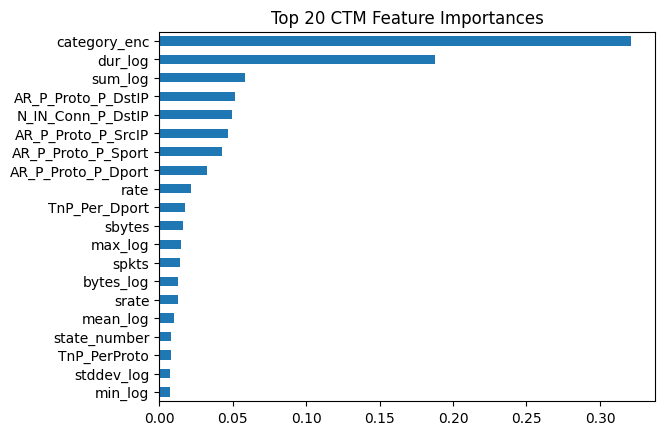

In [81]:
importances.head(20).plot(
    kind='barh',
    title='Top 20 CTM Feature Importances'
)
plt.gca().invert_yaxis()
plt.show()

In [82]:
importances.head(20)

category_enc          0.321436
dur_log               0.187816
sum_log               0.058216
AR_P_Proto_P_DstIP    0.051316
N_IN_Conn_P_DstIP     0.049381
AR_P_Proto_P_SrcIP    0.046694
AR_P_Proto_P_Sport    0.042960
AR_P_Proto_P_Dport    0.032752
rate                  0.021712
TnP_Per_Dport         0.017488
sbytes                0.016243
max_log               0.014715
spkts                 0.014186
bytes_log             0.013146
srate                 0.012658
mean_log              0.009927
state_number          0.008193
TnP_PerProto          0.008125
stddev_log            0.007727
min_log               0.007275
dtype: float64

In [83]:
TOP_N = 20

selected_features = importances.head(TOP_N).index.tolist()
selected_features

['category_enc',
 'dur_log',
 'sum_log',
 'AR_P_Proto_P_DstIP',
 'N_IN_Conn_P_DstIP',
 'AR_P_Proto_P_SrcIP',
 'AR_P_Proto_P_Sport',
 'AR_P_Proto_P_Dport',
 'rate',
 'TnP_Per_Dport',
 'sbytes',
 'max_log',
 'spkts',
 'bytes_log',
 'srate',
 'mean_log',
 'state_number',
 'TnP_PerProto',
 'stddev_log',
 'min_log']

In [84]:
X_reduced = X[selected_features].copy()

X_reduced.shape

(3668522, 21)

In [85]:
X_reduced = X_reduced.astype("float32")
y = y.astype("int8")

In [86]:
X_reduced.isna().any().any()

np.False_

In [88]:
df_seq = df_final.reset_index(drop=True)

In [ ]:
df_seq.shape

(3668522, 35)

In [98]:
TARGET_COL = "category_enc"

FEATURE_COLS = [
    'dur_log',
    'sum_log',
    'AR_P_Proto_P_DstIP',
    'N_IN_Conn_P_DstIP',
    'AR_P_Proto_P_SrcIP',
    'AR_P_Proto_P_Sport',
    'AR_P_Proto_P_Dport',
    'rate',
    'TnP_Per_Dport',
    'sbytes',
    'max_log',
    'spkts',
    'bytes_log',
    'srate',
    'mean_log',
    'state_number',
    'TnP_PerProto',
    'stddev_log',
    'min_log'
]

In [99]:
df_seq = df_final[FEATURE_COLS + [TARGET_COL]].reset_index(drop=True)

In [96]:
df_seq.shape
df_seq.isna().any().any()

np.False_

In [100]:
df_seq.shape

(3668522, 21)

In [101]:
print(TARGET_COL in FEATURE_COLS)

False


In [102]:
FEATURE_COLS = [c for c in FEATURE_COLS if c != "category_enc"]

Rebuild df_seq

In [103]:
df_seq = df_final[FEATURE_COLS + ["category_enc"]].reset_index(drop=True)

In [104]:
print(len(FEATURE_COLS))     # must be 19
print(df_seq.shape)         # must be (3668522, 20)

19
(3668522, 21)


In [105]:
set(df_seq.columns) - set(FEATURE_COLS) - {"category_enc"}

set()

In [106]:
df_seq = df_final.loc[:, FEATURE_COLS + ["category_enc"]]

In [107]:
print(df_seq.shape)
print(df_seq.columns)

(3668522, 21)
Index(['dur_log', 'sum_log', 'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP',
       'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport',
       'rate', 'TnP_Per_Dport', 'sbytes', 'max_log', 'spkts', 'bytes_log',
       'srate', 'mean_log', 'state_number', 'state_number', 'TnP_PerProto',
       'stddev_log', 'min_log', 'category_enc'],
      dtype='object')


In [108]:
df_seq = df_seq.loc[:, ~df_seq.columns.duplicated()]

In [109]:
print(df_seq.shape)
print(df_seq.columns)

(3668522, 20)
Index(['dur_log', 'sum_log', 'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP',
       'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport',
       'rate', 'TnP_Per_Dport', 'sbytes', 'max_log', 'spkts', 'bytes_log',
       'srate', 'mean_log', 'state_number', 'TnP_PerProto', 'stddev_log',
       'min_log', 'category_enc'],
      dtype='object')


In [111]:
X_array = df_seq[FEATURE_COLS].to_numpy(dtype="float32")
y_array = df_seq[TARGET_COL].to_numpy(dtype="int8")

X_array.shape, y_array.shape

((3668522, 19), (3668522,))

In [112]:
def sequence_generator(X, y, window, batch_size=2048):
    n_samples = len(X) - window
    while True:
        for start in range(0, n_samples, batch_size):
            end = min(start + batch_size, n_samples)

            X_batch = np.stack(
                [X[i:i+window] for i in range(start, end)],
                axis=0
            ).astype("float32")

            y_batch = y[start+window:end+window]

            yield X_batch, y_batch

In [113]:
WINDOW = 30  # example
gen = sequence_generator(X_array, y_array, WINDOW)

X_test, y_test = next(gen)

X_test.shape, y_test.shape

((2048, 30, 19), (2048,))

In [114]:
df_seq.to_pickle("df_seq_clean.pkl")

In [115]:
import numpy as np

ctm_importance = {
    "dur_log": 0.187816,
    "sum_log": 0.058216,
    "AR_P_Proto_P_DstIP": 0.051316,
    "N_IN_Conn_P_DstIP": 0.049381,
    "AR_P_Proto_P_SrcIP": 0.046694,
    "AR_P_Proto_P_Sport": 0.042960,
    "AR_P_Proto_P_Dport": 0.032752,
    "rate": 0.021712,
    "TnP_Per_Dport": 0.017488,
    "sbytes": 0.016243,
    "max_log": 0.014715,
    "spkts": 0.014186,
    "bytes_log": 0.013146,
    "srate": 0.012658,
    "mean_log": 0.009927,
    "state_number": 0.008193,
    "TnP_PerProto": 0.008125,
    "stddev_log": 0.007727,
    "min_log": 0.007275
}

FEATURE_COLS = [
    "dur_log", "sum_log", "AR_P_Proto_P_DstIP", "N_IN_Conn_P_DstIP",
    "AR_P_Proto_P_SrcIP", "AR_P_Proto_P_Sport", "AR_P_Proto_P_Dport",
    "rate", "TnP_Per_Dport", "sbytes", "max_log", "spkts", "bytes_log",
    "srate", "mean_log", "state_number", "TnP_PerProto",
    "stddev_log", "min_log"
]

ctm_weights = np.array([ctm_importance[f]
                       for f in FEATURE_COLS], dtype="float32")

In [116]:
ctm_weights = ctm_weights / ctm_weights.sum()
ctm_weights

array([0.30267027, 0.09381658, 0.08269705, 0.07957874, 0.07524858,
       0.06923114, 0.05278069, 0.03498944, 0.02818236, 0.02617601,
       0.0237136 , 0.0228611 , 0.02118511, 0.02039869, 0.01599761,
       0.01320323, 0.01309364, 0.01245226, 0.01172385], dtype=float32)

In [220]:
import numpy as np
from pathlib import Path

ctm_weights = np.array([
    0.187816, 0.058216, 0.051316, 0.049381, 0.046694,
    0.042960, 0.032752, 0.021712, 0.017488, 0.016243,
    0.014715, 0.014186, 0.013146, 0.012658, 0.009927,
    0.008193, 0.008125, 0.007727, 0.007275
], dtype="float32")

out_path = Path("notebook/ctm_weights.npy")
out_path.parent.mkdir(exist_ok=True)

np.save(out_path, ctm_weights)

print("Saved to:", out_path.resolve())

Saved to: C:\Desktop\Bot-Lot dataset\notebook\notebook\ctm_weights.npy


In [117]:
ctm_weights.shape

(19,)

In [118]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Multiply, Dropout
from tensorflow.keras.models import Model

In [140]:
# Convert dict → ordered vector
ctm_vector = np.array(
    [ctm_importance[f] for f in FEATURE_COLS],
    dtype="float32"
)

ctm_vector.shape

(19,)

In [141]:
inputs = Input(shape=(30, 19), name="input_sequence")

In [142]:
ctm_weights = tf.constant(ctm_vector, dtype=tf.float32)


def apply_ctm(x):
    return x * tf.reshape(ctm_weights, (1, 1, -1))


weighted = Lambda(apply_ctm, name="ctm_weighting")(inputs)

In [143]:
x = LSTM(
    64,
    return_sequences=False,
    dropout=0.2,
    name="lstm_1"
)(weighted)

In [144]:
x = Dense(32, activation="relu", name="dense_1")(x)
x = Dropout(0.2)(x)

outputs = Dense(5, activation="softmax", name="output")(x)

In [145]:
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_sequence (InputLayer)     │ (None, 30, 19)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ ctm_weighting (Lambda)          │ (None, 30, 19)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        21,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,749 (92.77 KB)

 Trainable params: 23,749 (92.77 KB)

 Non-trainable params: 0 (0.00 B)

In [146]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [147]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

In [148]:
classes = np.unique(y_array)

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_array
)

class_weight_dict = dict(zip(classes, class_weights))
class_weight_dict

{np.int8(0): np.float64(0.3808238659956483),
 np.int8(1): np.float64(0.4445992752657157),
 np.int8(2): np.float64(1538.1643605870022),
 np.int8(3): np.float64(8.055426977888057),
 np.int8(4): np.float64(9287.397468354431)}

In [152]:
class_weight_lookup = {
    int(k): float(v) for k, v in class_weight_dict.items()
}

In [158]:
def sequence_generator(X, y, window, batch_size=2048):
    n_samples = len(X) - window
    indices = np.arange(n_samples)

    while True:
        np.random.shuffle(indices)

        for start_idx in range(0, n_samples, batch_size):
            batch_indices = indices[start_idx:start_idx + batch_size]

            X_batch = np.array(
                [X[i:i+window] for i in batch_indices],
                dtype="float32"
            )

            y_batch = y[batch_indices + window]

            sample_weight = np.clip(
                np.array(
                    [class_weight_lookup[int(label)] for label in y_batch],
                    dtype="float32"
                ),
                1.0,
                50.0
            )

            yield X_batch, y_batch, sample_weight

In [149]:
WINDOW = 30
BATCH_SIZE = 2048
EPOCHS = 5     # start small

In [154]:
steps_per_epoch = (len(X_array) - WINDOW) // BATCH_SIZE

In [159]:
history = model.fit(
    sequence_generator(X_array, y_array, WINDOW, BATCH_SIZE),
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    verbose=1
)

Epoch 1/5
1791/1791 ━━━━━━━━━━━━━━━━━━━━ 731s 408ms/step - accuracy: 0.6748 - loss: 0.6383
Epoch 2/5
1791/1791 ━━━━━━━━━━━━━━━━━━━━ 727s 406ms/step - accuracy: 0.9189 - loss: 0.2259
Epoch 3/5
1791/1791 ━━━━━━━━━━━━━━━━━━━━ 875s 488ms/step - accuracy: 0.9415 - loss: 0.1607
Epoch 4/5
1791/1791 ━━━━━━━━━━━━━━━━━━━━ 837s 468ms/step - accuracy: 0.9500 - loss: 0.1374
Epoch 5/5
1791/1791 ━━━━━━━━━━━━━━━━━━━━ 881s 492ms/step - accuracy: 0.9582 - loss: 0.1172


In [160]:
VAL_SAMPLES = 200_000

X_val = X_array[-(VAL_SAMPLES + WINDOW):-WINDOW]
y_val = y_array[-VAL_SAMPLES:]

In [161]:
val_gen = sequence_generator(
    X_val,
    y_val,
    WINDOW,
    batch_size=2048
)

steps = len(y_val) // 2048

model.evaluate(val_gen, steps=steps)

97/97 ━━━━━━━━━━━━━━━━━━━━ 23s 208ms/step - accuracy: 0.4572 - loss: 4.9960


[4.995960712432861, 0.45715710520744324]

In [163]:
out = next(val_gen)
len(out), type(out)

(3, tuple)

In [164]:
y_true = []
y_pred = []

for _ in range(steps):
    Xb, yb, _ = next(val_gen)
    preds = model.predict(Xb, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(yb)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

In [165]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

cm = confusion_matrix(y_true, y_pred)
print(cm)

print(classification_report(y_true, y_pred, digits=4))

print("Macro-F1:", f1_score(y_true, y_pred, average="macro"))

[[     0 107223      0      0      0]
 [     0      0      0      0      0]
 [     0     37    414     16      0]
 [     3     77     36  90038      0]
 [     0      0      0     78      0]]
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000    107223
           1     0.0000    0.0000    0.0000         0
           2     0.9200    0.8865    0.9029       467
           3     0.9990    0.9987    0.9988     90154
           4     0.0000    0.0000    0.0000        78

    accuracy                         0.4570    197922
   macro avg     0.3838    0.3770    0.3804    197922
weighted avg     0.4572    0.4570    0.4571    197922

Macro-F1: 0.3803559135913589


In [166]:
y_true_bin = (y_true != 0).astype(int)
y_pred_bin = (y_pred != 0).astype(int)

In [167]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_true_bin, y_pred_bin))
print(classification_report(y_true_bin, y_pred_bin, digits=4))

[[     0 107223]
 [     3  90696]]
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000    107223
           1     0.4582    1.0000    0.6285     90699

    accuracy                         0.4582    197922
   macro avg     0.2291    0.5000    0.3142    197922
weighted avg     0.2100    0.4582    0.2880    197922



In [168]:
probs = model.predict(Xb, verbose=0)
anomaly_prob = 1.0 - probs[:, 0]  # class 0 = normal

In [170]:
VAL_BATCH_SIZE = 2048  # must match generator
val_steps = max(1, (len(X_val) - WINDOW) // VAL_BATCH_SIZE)

In [ ]:
val_gen = sequence_generator(
    X_val_array,
    y_val_array,
    WINDOW,
    batch_size=VAL_BATCH_SIZE
)

In [171]:
from sklearn.metrics import classification_report
import numpy as np

y_true_all = []
y_prob_all = []

for _ in range(val_steps):
    batch = next(val_gen)

    if len(batch) == 2:
        Xb, yb = batch
    else:
        Xb, yb, _ = batch

    probs = model.predict(Xb, verbose=0)

    anomaly_prob = 1.0 - probs[:, 0]  # class 0 = normal

    y_true_all.extend((yb != 0).astype(int))
    y_prob_all.extend(anomaly_prob)

y_true_all = np.array(y_true_all)
y_prob_all = np.array(y_prob_all)

In [172]:
for t in [0.5, 0.7, 0.85, 0.9, 0.95, 0.98]:
    y_pred_t = (y_prob_all > t).astype(int)
    print(f"\nThreshold = {t}")
    print(classification_report(y_true_all, y_pred_t, digits=4))


Threshold = 0.5
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000    107218
           1     0.4583    1.0000    0.6285     90704

    accuracy                         0.4583    197922
   macro avg     0.2291    0.5000    0.3143    197922
weighted avg     0.2100    0.4583    0.2880    197922


Threshold = 0.7
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000    107218
           1     0.4582    0.9997    0.6284     90704

    accuracy                         0.4581    197922
   macro avg     0.2291    0.4998    0.3142    197922
weighted avg     0.2100    0.4581    0.2880    197922


Threshold = 0.85
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000    107218
           1     0.4582    0.9996    0.6283     90704

    accuracy                         0.4581    197922
   macro avg     0.2291    0.4998    0.3142    197922
weighted avg     0.210

In [173]:
print("y_true:", y_true_all.shape)
print("y_prob:", y_prob_all.shape)

y_true: (197922,)
y_prob: (197922,)


In [174]:
y_binary = (y != 0).astype(np.int8)

In [175]:
Dense(1, activation="sigmoid")

<Dense name=dense, built=False>

In [176]:
loss = "binary_crossentropy"

In [177]:
y_binary

0         1
1         1
2         1
3         1
4         1
         ..
668517    1
668518    1
668519    1
668520    1
668521    1
Name: category_enc, Length: 3668522, dtype: int8

In [178]:
# 0 = Normal, 1 = Attack
y_binary = (y_array != 0).astype("int8")

np.unique(y_binary, return_counts=True)

(array([0, 1], dtype=int8), array([1926624, 1741898]))

TRAIN / VALIDATION SPLIT (TIME-SAFE)

In [179]:
SPLIT = 0.8
n_total = len(X_array)

split_idx = int(n_total * SPLIT)

X_train = X_array[:split_idx]
y_train = y_binary[:split_idx]

X_val = X_array[split_idx:]
y_val = y_binary[split_idx:]

COMPUTE CLASS WEIGHTS (ON RAW LABELS)

In [180]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.array([0, 1])
weights = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train
)

class_weight_dict = {
    0: weights[0],
    1: weights[1]
}

class_weight_dict

{0: np.float64(1.1423459605140138), 1: np.float64(0.8891983687418952)}

WEIGHTED SEQUENCE GENERATOR (CRITICAL)

In [181]:
def weighted_sequence_generator(X, y, window, batch_size, class_weight):
    n_samples = len(X) - window

    while True:
        for start in range(0, n_samples, batch_size):
            end = min(start + batch_size, n_samples)

            X_batch = np.array(
                [X[i:i+window] for i in range(start, end)],
                dtype="float32"
            )

            y_batch = y[start+window:end+window].astype("float32")

            sample_weight = np.array(
                [class_weight[int(label)] for label in y_batch],
                dtype="float32"
            )

            yield X_batch, y_batch, sample_weight

In [ ]:
FEATURE_COLS

<function list.index(value, start=0, stop=9223372036854775807, /)>

CTM weights (must match feature count = 19)

In [185]:
ctm_vector = np.array(
    [ctm_importance[col] for col in FEATURE_COLS],
    dtype="float32"
)

ctm_vector.shape

(19,)

In [186]:
ctm_vector

array([0.187816, 0.058216, 0.051316, 0.049381, 0.046694, 0.04296 ,
       0.032752, 0.021712, 0.017488, 0.016243, 0.014715, 0.014186,
       0.013146, 0.012658, 0.009927, 0.008193, 0.008125, 0.007727,
       0.007275], dtype=float32)

In [187]:
print(ctm_vector)
print(len(ctm_vector))

[0.187816 0.058216 0.051316 0.049381 0.046694 0.04296  0.032752 0.021712
 0.017488 0.016243 0.014715 0.014186 0.013146 0.012658 0.009927 0.008193
 0.008125 0.007727 0.007275]
19


FINAL, CORRECT CTM-LSTM MODEL (NO VARIANTS)

In [188]:


WINDOW = 30
N_FEATURES = 19
N_CLASSES = 5

# Input
inputs = Input(shape=(WINDOW, N_FEATURES), name="input_sequence")

# CTM weighting (feature-wise, time-invariant)
ctm_weights = tf.constant(ctm_vector, dtype=tf.float32)

weighted = Lambda(
    lambda x: x * ctm_weights,
    name="ctm_weighting"
)(inputs)

# LSTM backbone
x = LSTM(
    64,
    return_sequences=False,
    dropout=0.2,
    name="lstm_1"
)(weighted)

# Dense head
x = Dense(32, activation="relu", name="dense_1")(x)
x = Dropout(0.2)(x)

outputs = Dense(N_CLASSES, activation="softmax", name="output")(x)

model = Model(inputs, outputs)

Compile (correct loss)

In [189]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_sequence (InputLayer)     │ (None, 30, 19)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ ctm_weighting (Lambda)          │ (None, 30, 19)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        21,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,749 (92.77 KB)

 Trainable params: 23,749 (92.77 KB)

 Non-trainable params: 0 (0.00 B)

STEP G — EVALUATION (NO ERRORS THIS TIME)
Define training parameters

In [190]:
BATCH_SIZE = 2048
WINDOW = 30
EPOCHS = 5

steps_per_epoch = (len(X_array) - WINDOW) // BATCH_SIZE

Train the model

In [191]:
history = model.fit(
    sequence_generator(X_array, y_array, WINDOW, BATCH_SIZE),
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    verbose=1
)

Epoch 1/5
1791/1791 ━━━━━━━━━━━━━━━━━━━━ 866s 468ms/step - accuracy: 0.8451 - loss: 0.3743
Epoch 2/5
1791/1791 ━━━━━━━━━━━━━━━━━━━━ 847s 473ms/step - accuracy: 0.9463 - loss: 0.1475
Epoch 3/5
1791/1791 ━━━━━━━━━━━━━━━━━━━━ 893s 498ms/step - accuracy: 0.9534 - loss: 0.1247
Epoch 4/5
1791/1791 ━━━━━━━━━━━━━━━━━━━━ 1223s 683ms/step - accuracy: 0.9645 - loss: 0.0980
Epoch 5/5
1791/1791 ━━━━━━━━━━━━━━━━━━━━ 1195s 667ms/step - accuracy: 0.9691 - loss: 0.0876


EVALUATION (NO SHAPE / COUNT ERRORS)

In [194]:
VAL_STEPS = 97

val_gen = sequence_generator(
    X_array,
    y_array,
    WINDOW,
    BATCH_SIZE
)

In [195]:
def sequence_generator(X, y, window, batch_size=2048):
    n_samples = len(X) - window

    while True:
        for start in range(0, n_samples, batch_size):
            end = min(start + batch_size, n_samples)

            X_batch = np.array(
                [X[i:i+window] for i in range(start, end)],
                dtype="float32"
            )

            y_batch = y[start+window:end+window]

            yield X_batch, y_batch

Collect predictions safely

In [197]:
tmp = next(val_gen)
type(tmp), len(tmp)

(tuple, 3)

In [198]:
y_true = []
y_pred = []
y_prob = []

for _ in range(VAL_STEPS):
    batch = next(val_gen)   # batch has length 3
    Xb, yb = batch[0], batch[1]

    preds = model.predict(Xb, verbose=0)

    y_true.extend(yb)
    y_pred.extend(np.argmax(preds, axis=1))
    y_prob.extend(np.max(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_prob = np.array(y_prob)

In [199]:
y_true.shape, y_pred.shape, y_prob.shape

((198656,), (198656,), (198656,))

Multiclass Metrics (CTM-LSTM classifier)

In [200]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, digits=4))

[[40119 64473     0    57     0]
 [  257 88721     0     1     0]
 [    0     1    31     0     0]
 [    0     2     0  4988     1]
 [    0     0     0     5     0]]
              precision    recall  f1-score   support

           0     0.9936    0.3834    0.5533    104649
           1     0.5791    0.9971    0.7327     88979
           2     1.0000    0.9688    0.9841        32
           3     0.9875    0.9994    0.9934      4991
           4     0.0000    0.0000    0.0000         5

    accuracy                         0.6738    198656
   macro avg     0.7121    0.6697    0.6527    198656
weighted avg     0.8078    0.6738    0.6448    198656



Build binary ground truth

In [201]:
# Assumption: class 0 = normal, others = attack
y_true_bin = (y_true != 0).astype(int)

In [202]:
# anomaly probability = 1 - P(normal)
anomaly_prob = 1.0 - y_prob

In [203]:
from sklearn.metrics import classification_report

for t in [0.5, 0.7, 0.85, 0.9, 0.95]:
    y_pred_bin = (anomaly_prob >= t).astype(int)
    print(f"\nThreshold = {t}")
    print(classification_report(y_true_bin, y_pred_bin, digits=4))


Threshold = 0.5
              precision    recall  f1-score   support

           0     0.5267    0.9997    0.6899    104649
           1     0.1463    0.0001    0.0001     94007

    accuracy                         0.5266    198656
   macro avg     0.3365    0.4999    0.3450    198656
weighted avg     0.3467    0.5266    0.3635    198656


Threshold = 0.7
              precision    recall  f1-score   support

           0     0.5268    1.0000    0.6901    104649
           1     0.0000    0.0000    0.0000     94007

    accuracy                         0.5268    198656
   macro avg     0.2634    0.5000    0.3450    198656
weighted avg     0.2775    0.5268    0.3635    198656


Threshold = 0.85
              precision    recall  f1-score   support

           0     0.5268    1.0000    0.6901    104649
           1     0.0000    0.0000    0.0000     94007

    accuracy                         0.5268    198656
   macro avg     0.2634    0.5000    0.3450    198656
weighted avg     0.277

In [205]:
model.save("ctm_lstm_multiclass.keras")

VISUALIZE YOUR RESULTS (NOW)

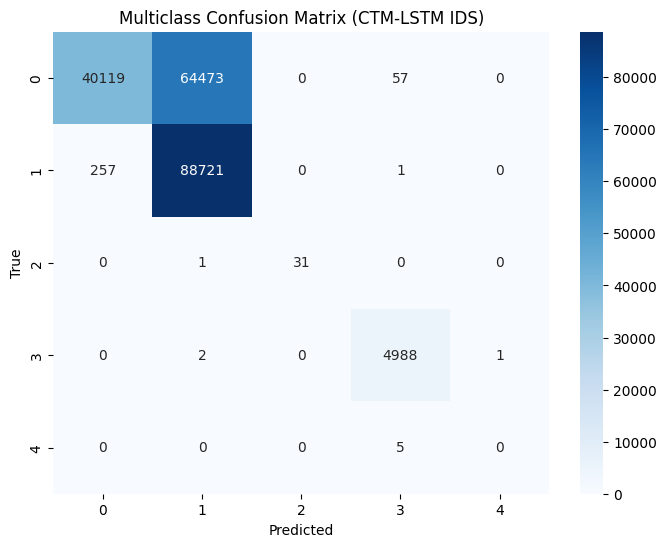

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Multiclass Confusion Matrix (CTM-LSTM IDS)")
plt.show()

F1-Score Per Class (Critical Insight)

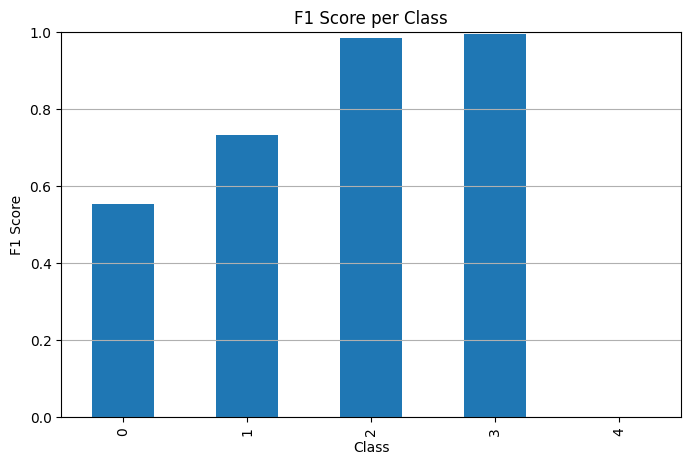

In [207]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_true, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
df.loc[['0', '1', '2', '3', '4'], 'f1-score'].plot(kind='bar')
plt.title("F1 Score per Class")
plt.ylabel("F1 Score")
plt.xlabel("Class")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

Training History (Learning Stability)

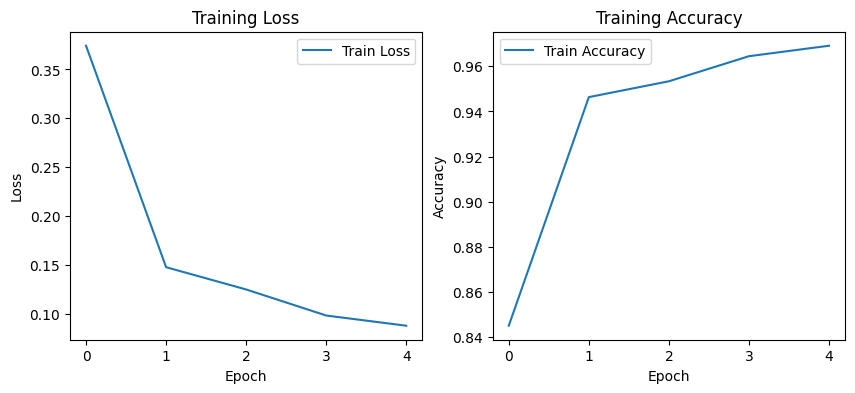

In [210]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

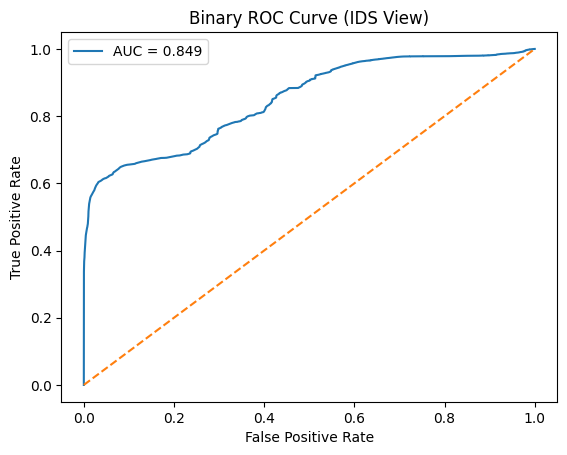

In [209]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true_bin, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Binary ROC Curve (IDS View)")
plt.legend()
plt.show()

WITHOUT validation, you can only plot training curves.

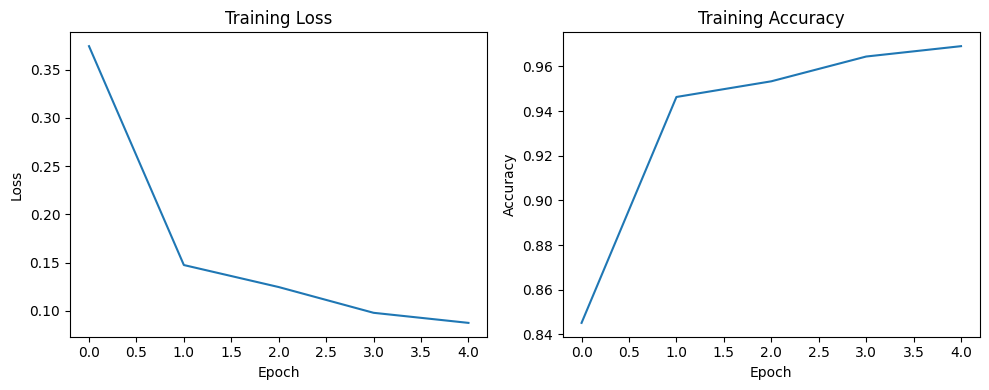

In [211]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"])
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"])
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

ADD VALIDATION NEXT TIME If you want validation curves in the future, train like this

In [212]:
train_gen = sequence_generator(
    X_train, y_train,
    window=WINDOW,
    batch_size=BATCH_SIZE
)

val_gen = sequence_generator(
    X_val, y_val,
    window=WINDOW,
    batch_size=BATCH_SIZE
)

In [213]:
TRAIN_STEPS = len(X_train) // BATCH_SIZE
VAL_STEPS = len(X_val) // BATCH_SIZE

In [214]:
history = model.fit(
    train_gen,
    steps_per_epoch=TRAIN_STEPS,
    epochs=EPOCHS,
    validation_data=val_gen,
    validation_steps=VAL_STEPS
)

Epoch 1/5
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 826s 562ms/step - accuracy: 0.9955 - loss: 0.0365 - val_accuracy: 0.8757 - val_loss: 2.4175
Epoch 2/5
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 784s 546ms/step - accuracy: 0.9694 - loss: 0.1841 - val_accuracy: 0.8749 - val_loss: 1.3315
Epoch 3/5
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 781s 545ms/step - accuracy: 0.9719 - loss: 0.1636 - val_accuracy: 0.8811 - val_loss: 0.8827
Epoch 4/5
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 884s 617ms/step - accuracy: 0.9675 - loss: 0.1669 - val_accuracy: 0.9204 - val_loss: 0.6283
Epoch 5/5
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 947s 661ms/step - accuracy: 0.9601 - loss: 0.1818 - val_accuracy: 0.9067 - val_loss: 0.5710


Validation visualization

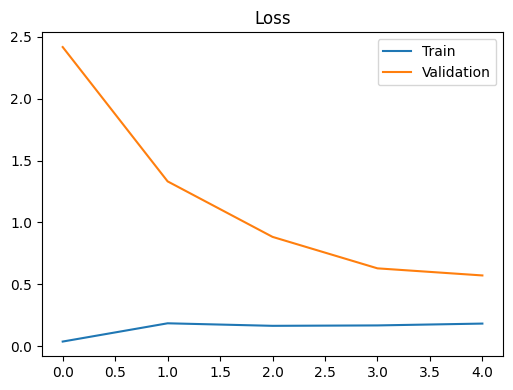

In [216]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")
plt.legend()
plt.title("Loss")


plt.tight_layout()
plt.show()

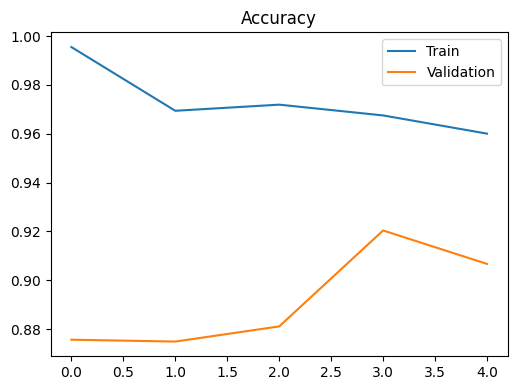

In [217]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.legend()
plt.title("Accuracy")

plt.tight_layout()
plt.show()

In [219]:
model.save("ctm_lstm_ids_model.keras")

np.save("ctm_feature_weights.npy", ctm_vector)

In [221]:
import numpy as np
from pathlib import Path

# ===============================
# CONFIG
# ===============================
BASE_DIR = Path.cwd().parents[0]  # project root
SAVE_DIR = BASE_DIR / "analysis" / "saved_outputs"
SAVE_DIR.mkdir(parents=True, exist_ok=True)

# ===============================
# COLLECT PREDICTIONS
# ===============================
y_true = []
y_pred = []
y_prob = []

for _ in range(VAL_STEPS):
    batch = next(val_gen)

    # generator returns (X, y, sample_weight) OR similar
    Xb = batch[0]
    yb = batch[1]

    probs = model.predict(Xb, verbose=0)

    y_true.extend(yb)
    y_pred.extend(np.argmax(probs, axis=1))
    y_prob.extend(probs)

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_prob = np.array(y_prob)

# Binary anomaly score: 1 - P(normal)
anomaly_score = 1.0 - y_prob[:, 0]

# ===============================
# SAVE TO DISK
# ===============================
np.save(SAVE_DIR / "y_true.npy", y_true)
np.save(SAVE_DIR / "y_pred.npy", y_pred)
np.save(SAVE_DIR / "y_prob.npy", y_prob)
np.save(SAVE_DIR / "anomaly_score.npy", anomaly_score)

print("Saved outputs to:", SAVE_DIR)
print("y_true:", y_true.shape)
print("y_pred:", y_pred.shape)
print("y_prob:", y_prob.shape)
print("anomaly_score:", anomaly_score.shape)

Saved outputs to: c:\Desktop\Bot-Lot dataset\analysis\saved_outputs
y_true: (731627,)
y_pred: (731627,)
y_prob: (731627, 5)
anomaly_score: (731627,)
